# Iris Dataset

RBF Kernel:
Accuracy: 1.0


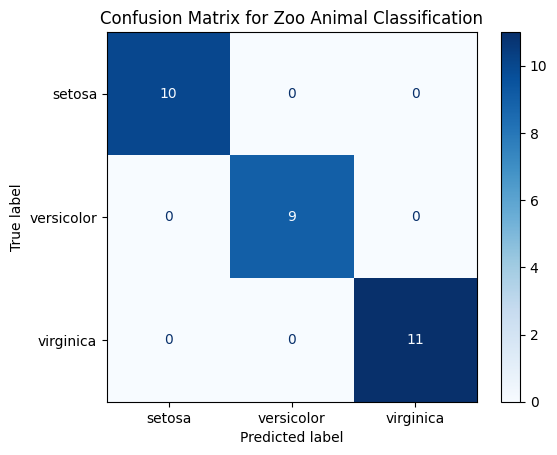


Linear Kernel:
Accuracy: 1.0


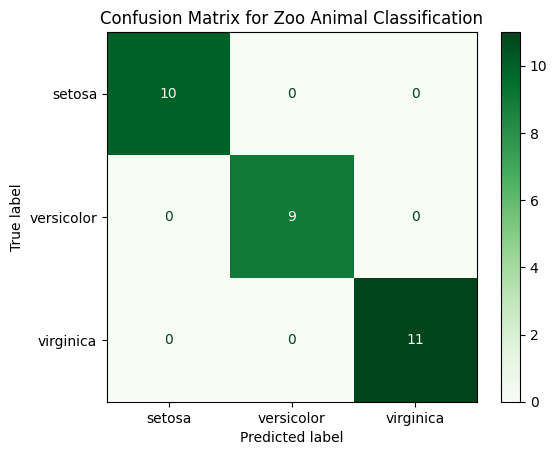

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

rbf_classifier = SVC(kernel='rbf')  # Create an SVM classifier with RBF kernel
rbf_classifier.fit(X_train, y_train)  # Train the classifier
rbf_predictions = rbf_classifier.predict(X_test)
rbf_accuracy = accuracy_score(y_test, rbf_predictions)
rbf_confusion = confusion_matrix(y_test, rbf_predictions)

linear_classifier = SVC(kernel='linear')  # Create an SVM classifier with linear kernel
linear_classifier.fit(X_train, y_train)  # Train the classifier
linear_predictions = linear_classifier.predict(X_test)
linear_accuracy = accuracy_score(y_test, linear_predictions)
linear_confusion = confusion_matrix(y_test, linear_predictions)

print("RBF Kernel:")
print("Accuracy:", rbf_accuracy)
#print("Confusion Matrix:\n", rbf_confusion)
disp = ConfusionMatrixDisplay(confusion_matrix=rbf_confusion, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Zoo Animal Classification")
plt.show()

print("\nLinear Kernel:")
print("Accuracy:", linear_accuracy)
#print("Confusion Matrix:\n", linear_confusion)
disp = ConfusionMatrixDisplay(confusion_matrix=linear_confusion, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix for Zoo Animal Classification")
plt.show()

# Letter-recognition

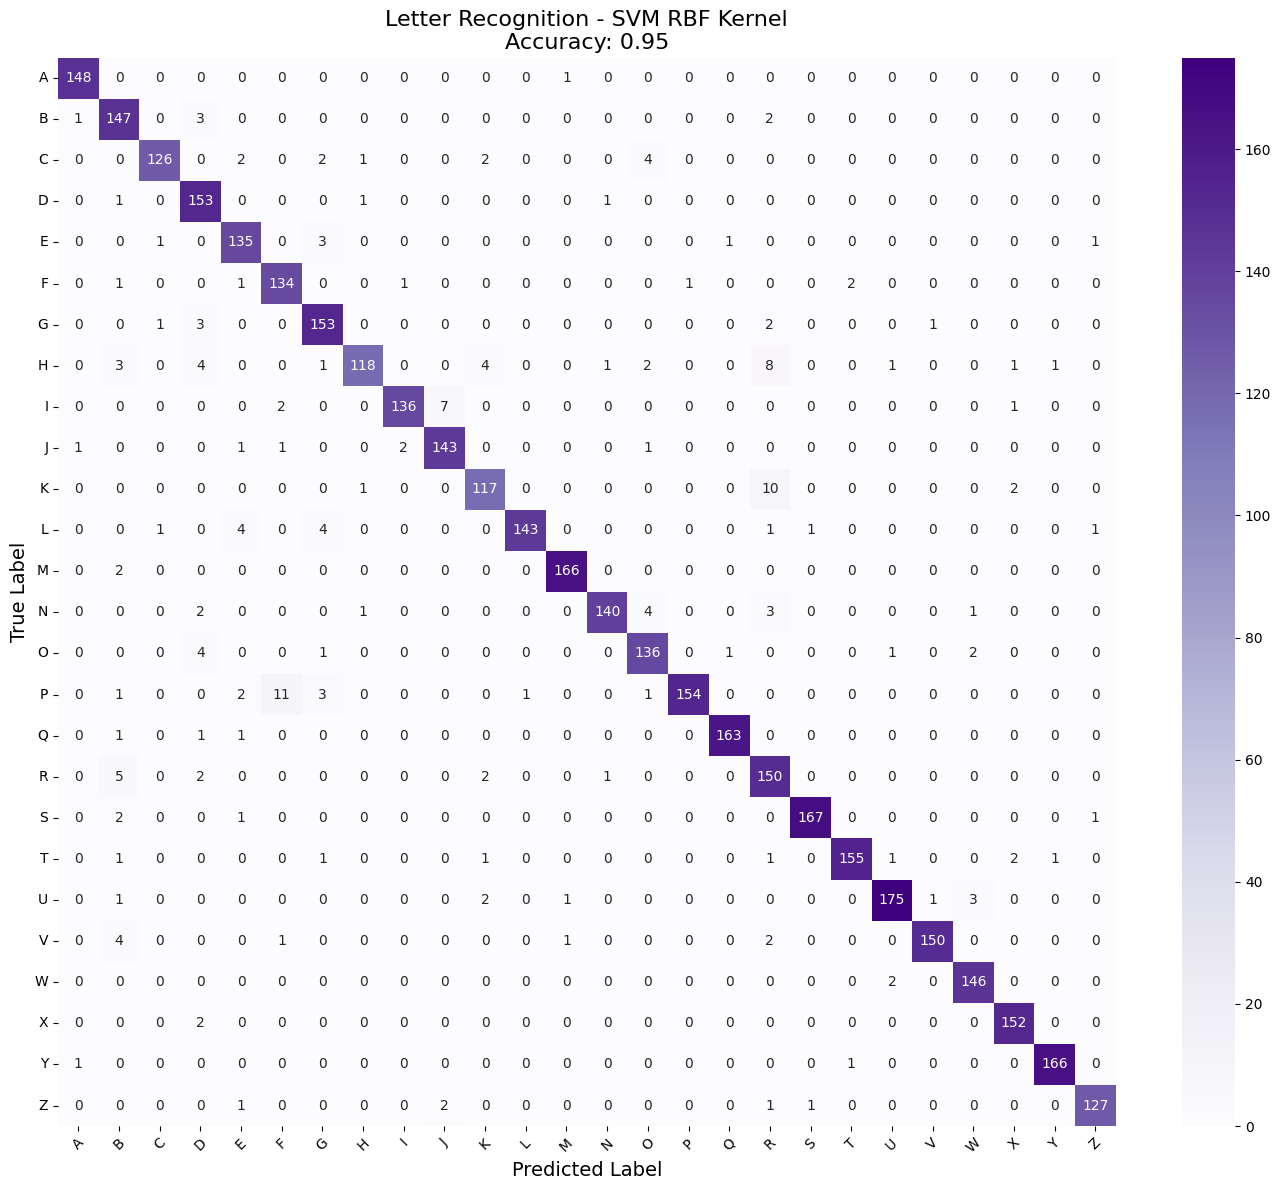

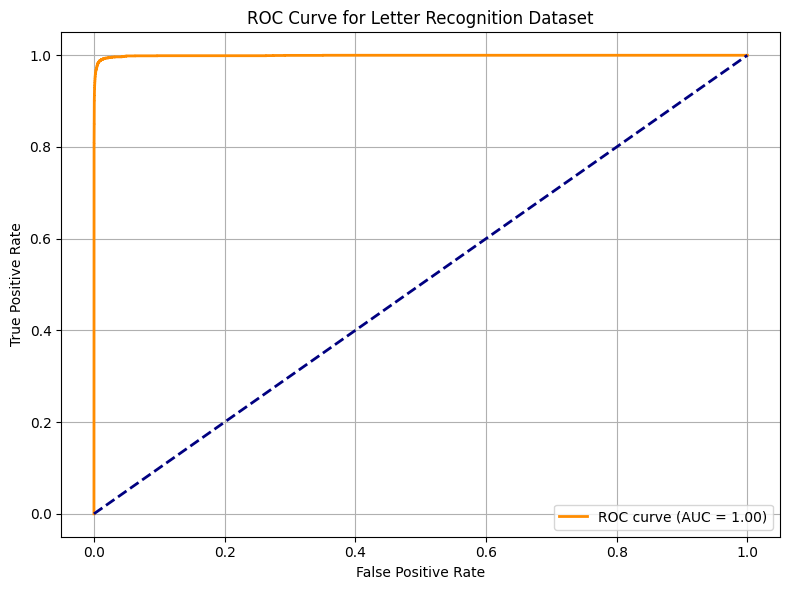

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

letters = pd.read_csv("/content/sample_data/letter-recognition.csv")

X_letters = letters.drop('letter', axis=1)
y_letters = letters['letter']

label_encoder_letters = LabelEncoder()
y_letters_encoded = label_encoder_letters.fit_transform(y_letters)
class_names_letters = label_encoder_letters.classes_

X_train_letters, X_test_letters, y_train_letters, y_test_letters = train_test_split(X_letters, y_letters_encoded, test_size=0.2, random_state=42)

scaler_letters = StandardScaler()
X_train_letters = scaler_letters.fit_transform(X_train_letters)
X_test_letters = scaler_letters.transform(X_test_letters)

svm_letters = SVC(kernel='rbf', probability=True)
svm_letters.fit(X_train_letters, y_train_letters)
y_pred_letters = svm_letters.predict(X_test_letters)

acc_letters = accuracy_score(y_test_letters, y_pred_letters)
cm_letters = confusion_matrix(y_test_letters, y_pred_letters)

plt.figure(figsize=(14, 12))
sns.heatmap(cm_letters, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_names_letters,
            yticklabels=class_names_letters,
            cbar=True)

plt.title(f'Letter Recognition - SVM RBF Kernel\nAccuracy: {acc_letters:.2f}', fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

y_test_binarized = label_binarize(y_test_letters, classes=np.unique(y_letters_encoded))
y_score = svm_letters.predict_proba(X_test_letters)
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
auc_score = roc_auc_score(y_test_binarized, y_score, average='macro')

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Letter Recognition Dataset")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()